In [1]:
# include matplotlib pandas
import matplotlib.pyplot as plt
import pandas as pd

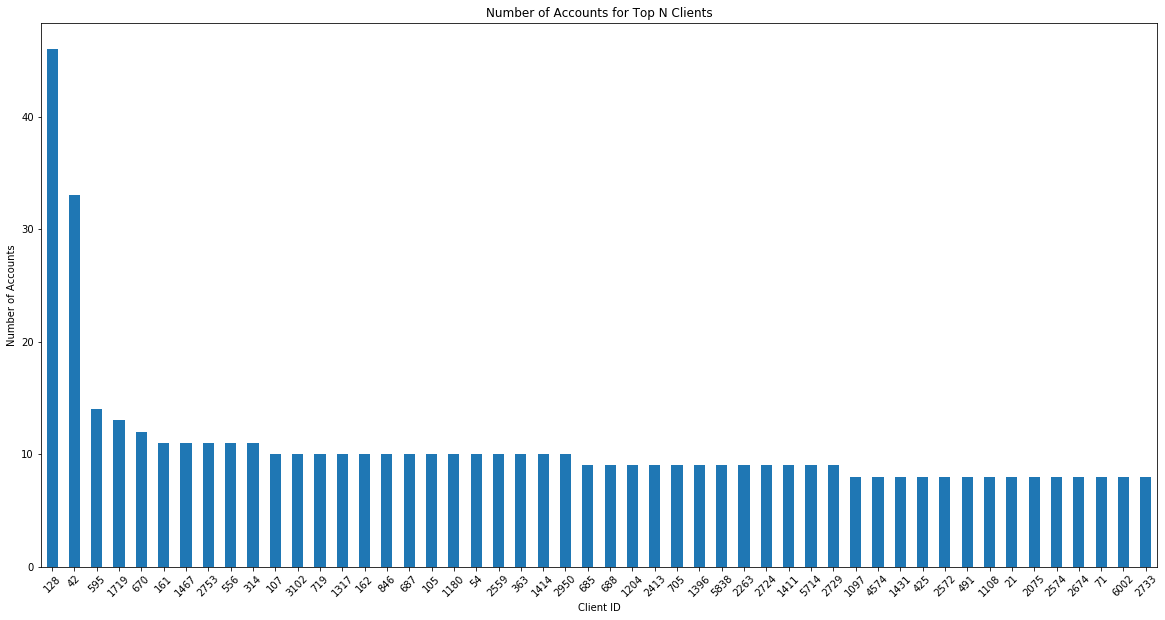

In [2]:
# read the data
clients_data = pd.read_csv('clients_data_competition.csv')

# plot account id with client id to check how many accounts owned by a client
# Calculate the number of accounts per client and sort it
accounts_per_client = clients_data['Client ID'].value_counts().sort_values(ascending=False)

# Optionally, select the top N clients to keep the plot readable
top_n = 50  # Adjust N based on your preference or dataset size
accounts_per_client_top_n = accounts_per_client.head(top_n)

plt.figure(figsize=(20, 10))  # Adjust the figure size as necessary
accounts_per_client_top_n.plot(kind='bar')

plt.title('Number of Accounts for Top N Clients')
plt.xlabel('Client ID')
plt.ylabel('Number of Accounts')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

plt.show()


### Data preprocessing

In [3]:
# change Client Type Name to 0 (Individual) and 1 (Companies)
clients_data['Client Type Name'] = clients_data['Client Type Name'].map({'Individuals': 0, 'Companies': 1})

In [4]:
# make -1 in Is Dormant column to 1
clients_data['Is Dormant'] = clients_data['Is Dormant'].replace(-1.0, 1).astype(int)

# add column to calculate time since OpenDate in years
# add column to calculate time since BirthDate in years
# make them to 1 decimal point
clients_data['OpenDate'] = pd.to_datetime(clients_data['OpenDate'])
clients_data['BirthDate'] = pd.to_datetime(clients_data['BirthDate'])
clients_data['Years Since Open'] = ((pd.Timestamp.now() - clients_data['OpenDate']).dt.days / 365.25).astype(int)
clients_data['Years Since Birth'] = ((pd.Timestamp.now() - clients_data['BirthDate']).dt.days / 365.25).astype(int)



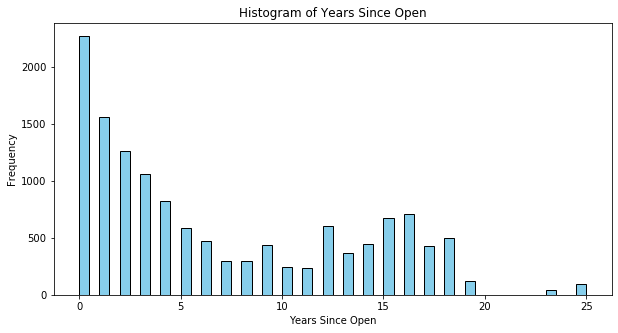

In [5]:
# histogram of Years Since Open
plt.figure(figsize=(10, 5))
plt.hist(clients_data['Years Since Open'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Years Since Open')
plt.xlabel('Years Since Open')
plt.ylabel('Frequency')
plt.show()

In [6]:
clients_data.head()

,Client ID,Account ID,Gender,Risk Rate,Company Name,Is Closed,Is Dormant,Is Profile Suspended,Is Client Suspended,Client Type Name,OpenDate,BirthDate,Years Since Open,Years Since Birth
0,0,0,Male,Low,HSB,0,0,0,0,0,2014-02-16,1990-07-27,10,33
1,1,1,Female,Low,HSB,0,1,1,0,0,2014-02-16,1963-10-22,10,60
2,2,2,Male,Low,HSB,0,0,0,0,0,2014-02-17,1971-05-14,10,52
3,3,3,Male,Low,HSB,0,0,0,0,0,2014-02-17,1953-01-14,10,71
4,4,4,Male,Low,HSB,0,0,0,0,0,2014-02-17,1976-06-09,10,47


### Visualization of the problem to decide what is the churn

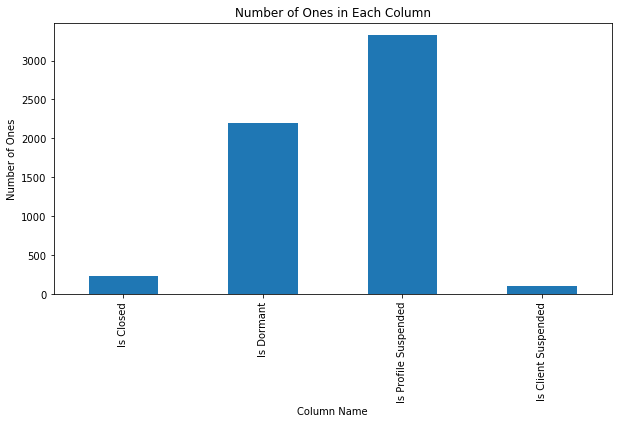

In [7]:
# count ones in Is Closed Is Dormant Is Profile Suspended cIs Client Suspended
# Calculate the number of ones in each column
ones_count = clients_data[['Is Closed', 'Is Dormant', 'Is Profile Suspended', 'Is Client Suspended']].sum()

# Plot the number of ones in each column
plt.figure(figsize=(10, 5))  # Adjust the figure size as necessary
ones_count.plot(kind='bar')

plt.title('Number of Ones in Each Column')
plt.xlabel('Column Name')
plt.ylabel('Number of Ones')

plt.show()

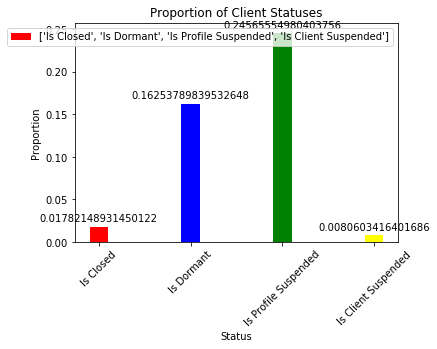

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'True' is represented as 1 and 'False' as 0, calculate the proportion of each status
statuses = ['Is Closed', 'Is Dormant', 'Is Profile Suspended', 'Is Client Suspended']
data = [clients_data[status].mean() for status in statuses]

# Set up the bar chart
x = np.arange(len(statuses))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
bars = ax.bar(x, data, width, label=statuses, color=['red', 'blue', 'green', 'yellow'])

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Status')
ax.set_ylabel('Proportion')
ax.set_title('Proportion of Client Statuses')
ax.set_xticks(x)
ax.set_xticklabels(statuses)
ax.legend()

# Function to add labels on top of each bar
def autolabel(bars):
    """Attach a text label above each bar in *bars*, displaying its height."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars)

fig.tight_layout()

plt.xticks(rotation=45)
plt.show()


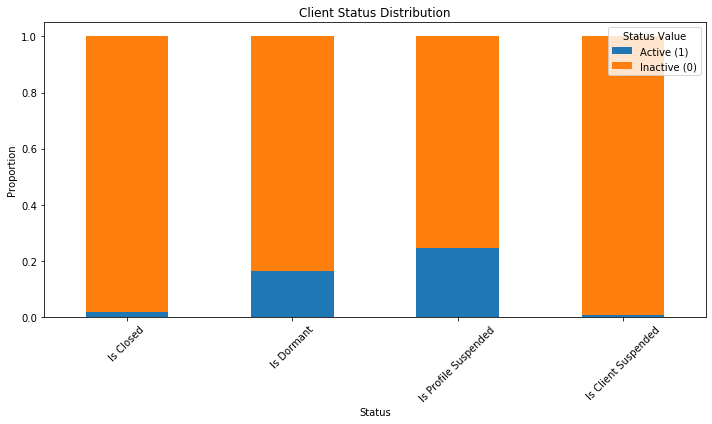

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming clients_data is your DataFrame and it's already loaded
status_columns = ['Is Closed', 'Is Dormant', 'Is Profile Suspended', 'Is Client Suspended']

# Calculate proportions of 1s for each status
status_proportions = pd.DataFrame({
    status: {
        'Active (1)': clients_data[status].mean(),
        'Inactive (0)': 1 - clients_data[status].mean()
    } for status in status_columns
})

# Transposing the DataFrame for easier plotting
status_proportions = status_proportions.T

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
status_proportions.plot(kind='bar', ax=ax, stacked=True)

ax.set_title('Client Status Distribution')
ax.set_ylabel('Proportion')
ax.set_xlabel('Status')
ax.legend(title='Status Value', loc='upper right')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### It is Clear that Is Profile Suspended got the highest counts

### Check if there only should be one status for each user

In [10]:
# Specify the columns to check
columns_to_check = ['Is Closed', 'Is Dormant', 'Is Profile Suspended', 'Is Client Suspended']

# Calculate the sum of '1's for each row across the specified columns
sum_of_ones = clients_data[columns_to_check].sum(axis=1)

# Check if any row has exactly one '1' across the specified columns
has_exactly_one = (sum_of_ones == 1).all()

print(has_exactly_one)

False


In [11]:
# pip install matplotlib==3.1.0

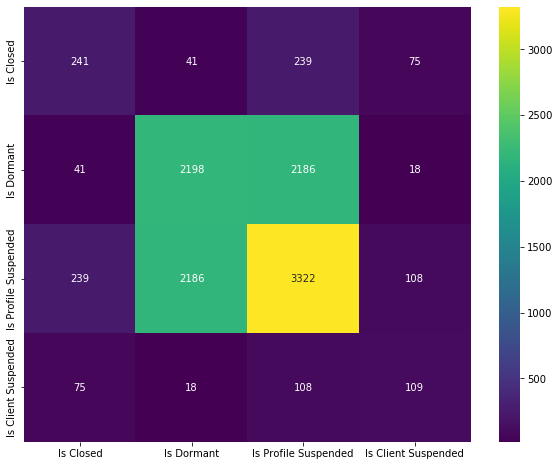

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the co-occurrence matrix
# Assuming that 'clients_data' is already loaded and contains the columns of interest
columns_to_check = ['Is Closed', 'Is Dormant', 'Is Profile Suspended', 'Is Client Suspended']
co_occurrence_matrix = pd.DataFrame(0, index=columns_to_check, columns=columns_to_check)

for i in columns_to_check:
    for j in columns_to_check:
        co_occurrence_matrix.loc[i, j] = np.logical_and(clients_data[i] == 1, clients_data[j] == 1).sum()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
# Ensure that annot is a DataFrame with the same shape as the data to force display of all numbers
sns.heatmap(co_occurrence_matrix, annot=co_occurrence_matrix, fmt="d", cmap='viridis')

plt.show()


In [13]:
# most common case is when a client is profile suspended alone and is domant alone
# second most common case is when a client is suspended and dormant

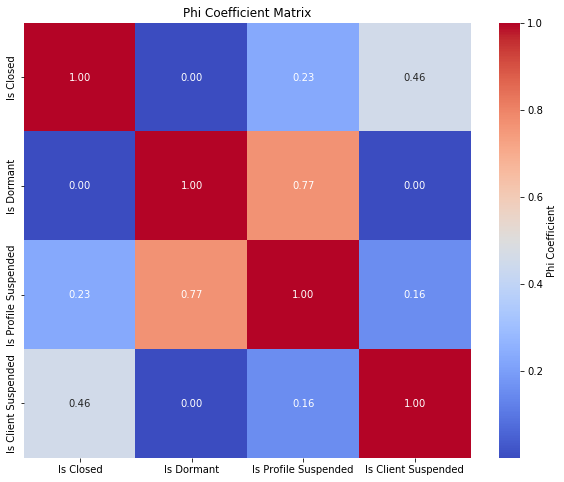

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# phi coefficient is a measure of association between two binary variables

# Define the columns to check
columns_to_check = ['Is Closed', 'Is Dormant', 'Is Profile Suspended', 'Is Client Suspended']

# Initialize an empty DataFrame to store the Phi coefficients
phi_coefficients = pd.DataFrame(index=columns_to_check, columns=columns_to_check, dtype=float)

for i in columns_to_check:
    for j in columns_to_check:
        contingency_table = pd.crosstab(clients_data[i], clients_data[j])
        # Calculate the Phi coefficient
        phi = (contingency_table.iloc[1, 1] * contingency_table.iloc[0, 0] - contingency_table.iloc[0, 1] * contingency_table.iloc[1, 0]) / np.sqrt((contingency_table.iloc[:, 1].sum() * contingency_table.iloc[:, 0].sum() * contingency_table.iloc[1].sum() * contingency_table.iloc[0].sum()))
        phi_coefficients.loc[i, j] = phi

# Plotting
plt.figure(figsize=(10, 8))
sns.heatmap(phi_coefficients, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Phi Coefficient'})
plt.title('Phi Coefficient Matrix')
plt.show()


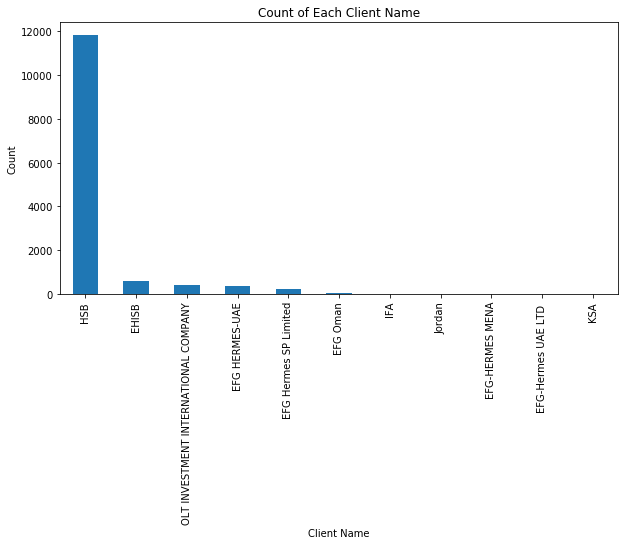

In [15]:
# get count of each client name
# Calculate the count of each client name
client_name_counts = clients_data['Company Name'].value_counts()

# Plot the count of each client name
plt.figure(figsize=(10, 5))  # Adjust the figure size as necessary
client_name_counts.plot(kind='bar')

plt.title('Count of Each Client Name')
plt.xlabel('Client Name')
plt.ylabel('Count')

plt.show()

In [16]:
# Drop rows with names different than 'HSB'
clients_data = clients_data[clients_data['Company Name'] == 'HSB']

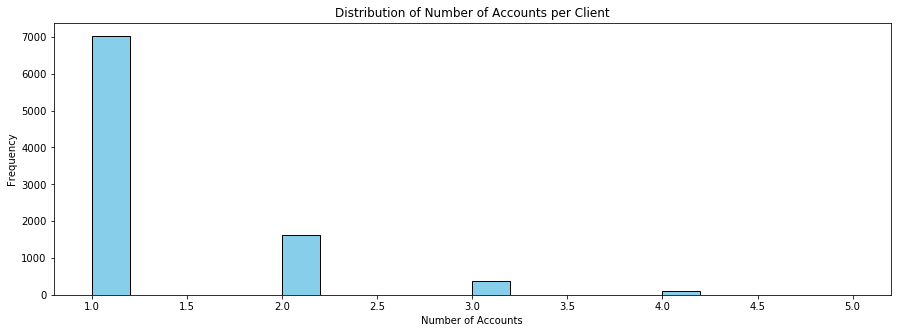

In [17]:
# get distribution of client numbers with account numbers
# Calculate the number of accounts per client
accounts_per_client = clients_data['Client ID'].value_counts()

# Plot the distribution of the number of accounts per client
plt.figure(figsize=(15, 5))  # Adjust the figure size as necessary
plt.hist(accounts_per_client, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Number of Accounts per Client')
plt.xlabel('Number of Accounts')
plt.ylabel('Frequency')
plt.show()

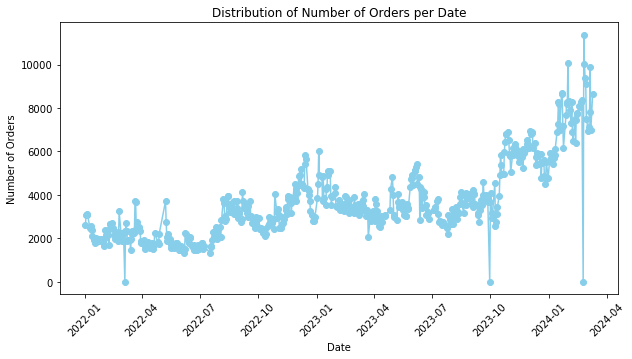

In [18]:
# load orders_data_competition.csv
order_data = pd.read_csv('orders_data_competition.csv')

# merge clients_data and order_data
# get distribution of Order Time

Date = pd.to_datetime(order_data['Order Time'])

# remove the time part
Date = Date.dt.date

# Count the number of orders for each date
order_count_per_date = Date.value_counts()

# Plot the distribution of the number of orders per date
plt.figure(figsize=(10, 5))  # Adjust the figure size as necessary
order_count_per_date.plot(kind='line', marker='o', color='skyblue')

plt.title('Distribution of Number of Orders per Date')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

plt.show()

In [19]:
# for each account number get last order date
# Convert 'Order Time' to datetime
order_data['Order Time'] = pd.to_datetime(order_data['Order Time'])

# Get the last order date for each account number
last_order_date_per_account = order_data.groupby('Account ID')['Order Time'].max()

last_order_date_per_account

Account ID
0       2022-10-19 12:24:04
1       2022-09-14 12:56:56
2       2024-02-28 11:06:33
3       2024-03-10 12:32:34
4       2024-02-26 12:47:33
                ...        
13517   2024-03-10 09:47:57
13518   2024-03-10 13:16:00
13519   2024-03-10 14:28:58
13520   2024-03-10 14:22:37
13521   2024-03-10 13:02:30
Name: Order Time, Length: 9729, dtype: datetime64[ns]

In [20]:
# join clients_data and order_data
# Merge the two DataFrames on 'Account ID'
merged_data = clients_data.merge(order_data, on='Account ID')

# Display the first few rows of the merged DataFrame
print(merged_data.head())


   Client ID  Account ID  Gender Risk Rate Company Name  Is Closed  \
0          0           0    Male       Low          HSB          0   
1          0           0    Male       Low          HSB          0   
2          1           1  Female       Low          HSB          0   
3          1           1  Female       Low          HSB          0   
4          1           1  Female       Low          HSB          0   

   Is Dormant  Is Profile Suspended  Is Client Suspended  Client Type Name  \
0           0                     0                    0                 0   
1           0                     0                    0                 0   
2           1                     1                    0                 0   
3           1                     1                    0                 0   
4           1                     1                    0                 0   

   ...    Order Via Is Completed  Is Canceled              Expire Date  \
0  ...  Call Center            1    

In [21]:
# For dormant/suspended accounts get the last order date
# Filter the merged DataFrame for dormant and suspended accounts
dormant_suspended_accounts = merged_data[(merged_data['Is Dormant'] == 1) | (merged_data['Is Client Suspended'] == 1)]

# Get the last order date for each account in the filtered DataFrame
last_order_date_dormant_suspended = dormant_suspended_accounts.groupby('Account ID')['Order Time'].max()

last_order_date_dormant_suspended


Account ID
1       2022-09-14 12:56:56
18      2022-07-17 11:10:19
40      2022-02-24 11:00:44
45      2022-03-23 12:39:47
50      2022-04-17 11:31:29
                ...        
13436   2022-03-07 11:12:32
13458   2023-02-08 13:11:22
13461   2022-04-05 11:45:34
13494   2023-01-05 11:12:48
13498   2023-01-16 12:25:28
Name: Order Time, Length: 1244, dtype: datetime64[ns]

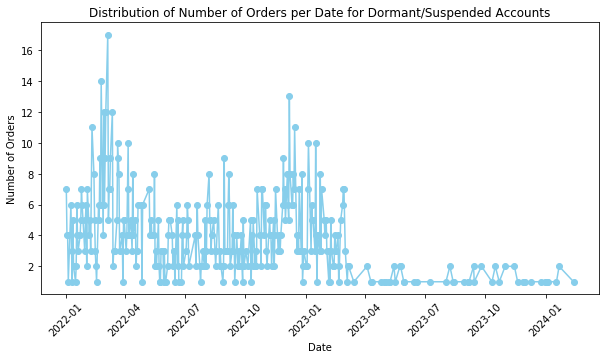

In [22]:
# plot last_order_date_dormant_suspended

# Count the number of orders for each date
order_count_per_date = last_order_date_dormant_suspended.dt.date.value_counts()

# Plot the distribution of the number of orders per date
plt.figure(figsize=(10, 5))  # Adjust the figure size as necessary
order_count_per_date.plot(kind='line', marker='o', color='skyblue')

plt.title('Distribution of Number of Orders per Date for Dormant/Suspended Accounts')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

plt.show()

In [23]:
# Based on the user's observation, let's directly implement the churn column addition and count the churned clients
# as per the provided code snippets.

# Add churn column to clients_data based on being dormant or closed
clients_data['Churn'] = (clients_data['Is Dormant'] == 1) | (clients_data['Is Closed'] == 1)

# Display the first few rows of the updated DataFrame
updated_df_head = clients_data.head()

# Calculate the number of churned clients
churned_clients_count = clients_data['Churn'].sum()

updated_df_head, churned_clients_count


(   Client ID  Account ID  Gender Risk Rate Company Name  Is Closed  \
 0          0           0    Male       Low          HSB          0   
 1          1           1  Female       Low          HSB          0   
 2          2           2    Male       Low          HSB          0   
 3          3           3    Male       Low          HSB          0   
 4          4           4    Male       Low          HSB          0   
 
    Is Dormant  Is Profile Suspended  Is Client Suspended  Client Type Name  \
 0           0                     0                    0                 0   
 1           1                     1                    0                 0   
 2           0                     0                    0                 0   
 3           0                     0                    0                 0   
 4           0                     0                    0                 0   
 
     OpenDate  BirthDate  Years Since Open  Years Since Birth  Churn  
 0 2014-02-16 1990-07-27 

In [24]:
# count the number of churned clients
# Calculate the number of churned clients
churned_clients_count = clients_data['Churn'].sum()

print(churned_clients_count)

1704


In [25]:
# churn percentage
# Calculate the churn percentage
churn_percentage = churned_clients_count / clients_data.shape[0] * 100
# print the churn percentage
print(churn_percentage)

14.419903528814421


In [26]:
# current customers would be with 0 in 4 status columns
# Calculate the number of current clients
current_clients_count = clients_data[(clients_data['Is Closed'] == 0) & (clients_data['Is Dormant'] == 0) & (clients_data['Is Profile Suspended'] == 0) & (clients_data['Is Client Suspended'] == 0)].shape[0]

# Calculate the current clients percentage
current_clients_percentage = current_clients_count / clients_data.shape[0] * 100

current_clients_count, current_clients_percentage

(9554, 80.84962342388084)

### Exploring orders data

In [27]:
order_data.head()

,Order ID,Account ID,Market Key,Security ID,Order Type,Order Time,Order Via,Is Completed,Is Canceled,Expire Date,Execution Status,quantity,Price,Sector Name,Executed Quantity,Quantity
0,0,2312,Egypt,0,Buy,2024-01-10 10:16:10,Online,1,0,2024-01-10 00:00:00.000,Executed,100,66.30,Real Estate,100,100
1,1,1196,Egypt,0,Sell,2024-01-10 10:16:11,Online,1,0,2024-01-10 00:00:00.000,Executed,200,66.00,Real Estate,200,200
2,2,1759,Egypt,0,Buy,2024-01-10 10:16:12,Online,0,1,2024-01-10 00:00:00.000,Not Executed,200,65.00,Real Estate,0,200
3,3,4476,Egypt,1,Sell,2024-01-10 10:16:16,Online,0,1,2024-01-10 00:00:00.000,Not Executed,820,75.20,Financials,0,820
4,4,838,Egypt,2,Sell,2024-01-10 10:16:18,Online,0,1,2024-01-10 00:00:00.000,Not Executed,500,10.68,Materials,0,500


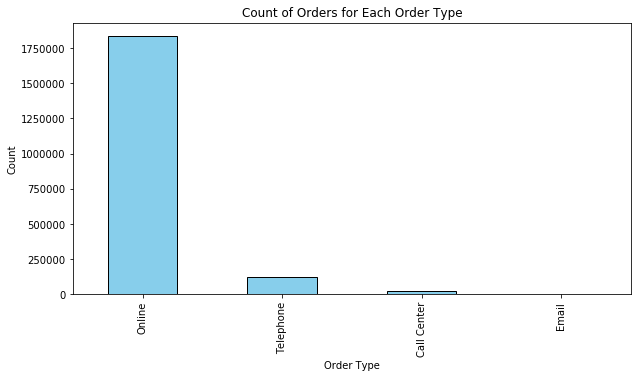

In [28]:
# count order via
# Calculate the count of orders for each order type
order_type_counts = order_data['Order Via'].value_counts()

# Plot the count of orders for each order type
plt.figure(figsize=(10, 5))  # Adjust the figure size as necessary
order_type_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Count of Orders for Each Order Type')
plt.xlabel('Order Type')
plt.ylabel('Count')

plt.show()


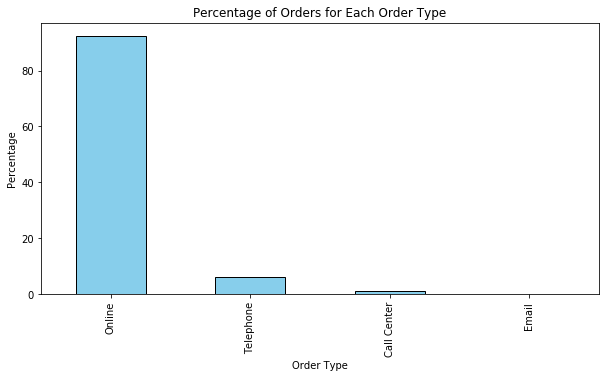

In [29]:
# show percentage of each order via

# Calculate the percentage of orders via 
order_type_percentages = order_data['Order Via'].value_counts(normalize=True) * 100

# Plot the percentage of orders for each order type
plt.figure(figsize=(10, 5))  # Adjust the figure size as necessary
order_type_percentages.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Percentage of Orders for Each Order Type')
plt.xlabel('Order Type')
plt.ylabel('Percentage')

plt.show()

### Trying to understand the behavior of the users canceling orders

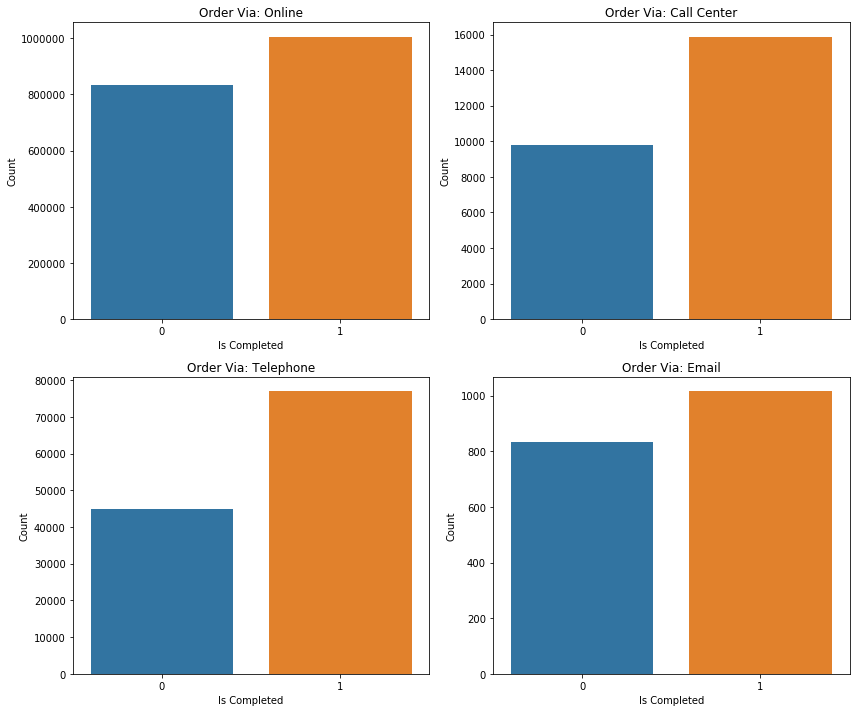

In [30]:
# for each via type plot if Is Completed,Is Canceled
# Set up the matplotlib figure
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Iterate over the order types and plot the counts of 'Is Completed' and 'Is Canceled'
for i, order_type in enumerate(order_data['Order Via'].unique()):
    data = order_data[order_data['Order Via'] == order_type]
    sns.countplot(x='Is Completed', data=data, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'Order Via: {order_type}')
    axes[i // 2, i % 2].set_xlabel('Is Completed')
    axes[i // 2, i % 2].set_ylabel('Count')

plt.tight_layout()
plt.show()


In [31]:
# check if order is completed and add column status to check for fully executed orders and partially executed orders else will be canceled 
# if Executed Quantity == Quantity then fully executed else partially executed else if Executed Quantity == 0 then canceled
# Add a new column 'Status' based on the conditions
order_data['Order Status'] = np.where(order_data['Executed Quantity'] == order_data['Quantity'], 'Fully Executed',
                                np.where(order_data['Executed Quantity'] == 0, 'Canceled', 'Partially Executed'))

# Display the first few rows of the updated DataFrame
order_data.head()


,Order ID,Account ID,Market Key,Security ID,Order Type,Order Time,Order Via,Is Completed,Is Canceled,Expire Date,Execution Status,quantity,Price,Sector Name,Executed Quantity,Quantity,Order Status
0,0,2312,Egypt,0,Buy,2024-01-10 10:16:10,Online,1,0,2024-01-10 00:00:00.000,Executed,100,66.30,Real Estate,100,100,Fully Executed
1,1,1196,Egypt,0,Sell,2024-01-10 10:16:11,Online,1,0,2024-01-10 00:00:00.000,Executed,200,66.00,Real Estate,200,200,Fully Executed
2,2,1759,Egypt,0,Buy,2024-01-10 10:16:12,Online,0,1,2024-01-10 00:00:00.000,Not Executed,200,65.00,Real Estate,0,200,Canceled
3,3,4476,Egypt,1,Sell,2024-01-10 10:16:16,Online,0,1,2024-01-10 00:00:00.000,Not Executed,820,75.20,Financials,0,820,Canceled
4,4,838,Egypt,2,Sell,2024-01-10 10:16:18,Online,0,1,2024-01-10 00:00:00.000,Not Executed,500,10.68,Materials,0,500,Canceled


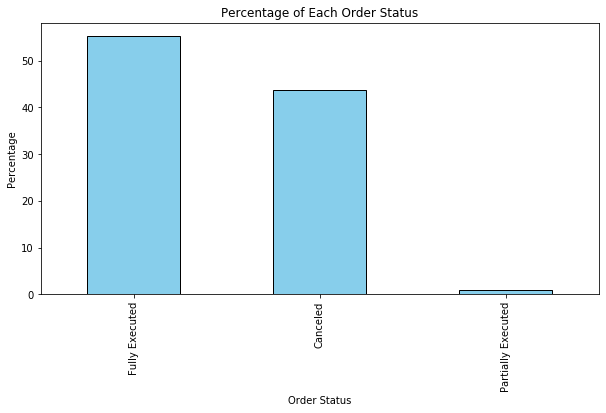

In [32]:
# Calculate the count of each order status
order_status_counts = order_data['Order Status'].value_counts()

# Calculate the total count
total_count = order_status_counts.sum()

# Calculate the percentage of each order status
order_status_percentages = (order_status_counts / total_count) * 100

# Plot the percentage of each order status
plt.figure(figsize=(10, 5))  # Adjust the figure size as necessary
order_status_percentages.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Percentage of Each Order Status')
plt.xlabel('Order Status')
plt.ylabel('Percentage')

plt.show()

### Checking canceled orders vs Sector Name to get what sector is more likely to cancel orders

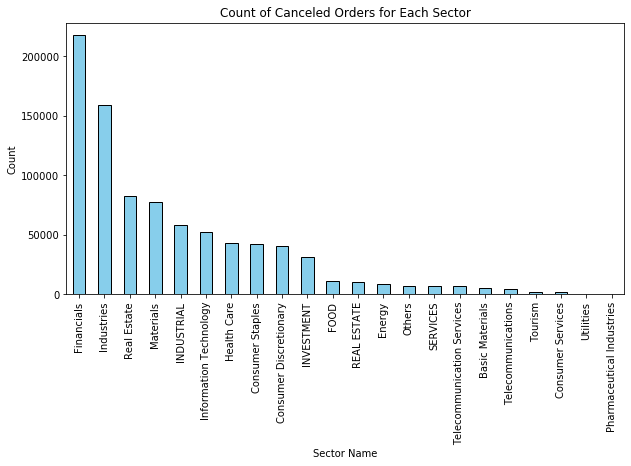

In [33]:
# check distribution of canceled orders vs Sector Name

# Calculate the count of canceled orders for each sector
canceled_orders_per_sector = order_data[order_data['Order Status'] == 'Canceled']['Sector Name'].value_counts()

# Plot the count of canceled orders for each sector
plt.figure(figsize=(10, 5))  # Adjust the figure size as necessary
canceled_orders_per_sector.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Count of Canceled Orders for Each Sector')
plt.xlabel('Sector Name')
plt.ylabel('Count')

plt.show()

In [34]:
# check if quantity == Quantity for all orders
quantity = (order_data['Quantity'] == order_data['quantity']).all()
quantity

# drop quantity column
order_data.drop('quantity', axis=1, inplace=True)

In [35]:
# for dormant and closed accounts get how many get distribution for Fully Executed, Partially Executed, Canceled
# Filter the merged DataFrame for dormant and closed accounts
dormant_closed_accounts = merged_data[(merged_data['Is Dormant'] == 1) | (merged_data['Is Closed'] == 1)]

# Merge the filtered DataFrame with the order_data
merged_dormant_closed = dormant_closed_accounts.merge(order_data, on='Account ID')


In [41]:
# print columns names in merged_dormant_closed
print(merged_dormant_closed.columns)

Index(['Client ID', 'Account ID', 'Gender', 'Risk Rate', 'Company Name',
       'Is Closed', 'Is Dormant', 'Is Profile Suspended',
       'Is Client Suspended', 'Client Type Name', 'OpenDate', 'BirthDate',
       'Years Since Open', 'Years Since Birth', 'Order ID_x', 'Market Key_x',
       'Security ID_x', 'Order Type_x', 'Order Time_x', 'Order Via_x',
       'Is Completed_x', 'Is Canceled_x', 'Expire Date_x',
       'Execution Status_x', 'quantity', 'Price_x', 'Sector Name_x',
       'Executed Quantity_x', 'Quantity_x', 'Order ID_y', 'Market Key_y',
       'Security ID_y', 'Order Type_y', 'Order Time_y', 'Order Via_y',
       'Is Completed_y', 'Is Canceled_y', 'Expire Date_y',
       'Execution Status_y', 'Price_y', 'Sector Name_y', 'Executed Quantity_y',
       'Quantity_y', 'Order Status'],
      dtype='object')


### Doing analysis on accounts

In [47]:
# for each account get net income by summing up the Executed Quantity * Price for each order and checking Order Type if Buy or Sell
# Calculate the net income for each account
# check first if order is buy or sell
# then calculate net income by summing up the Executed Quantity * Price for each order
# then group by Account ID and sum the net income
merged_dormant_closed['Net Income'] = np.where(merged_dormant_closed['Order Type_y'] == 'Sell', 
                                               merged_dormant_closed['Executed Quantity_y'] * merged_dormant_closed['Price_y'], 
                                               -merged_dormant_closed['Executed Quantity_y'] * merged_dormant_closed['Price_y'])

In [ ]:
# Group by 'Account ID' and sum the net income
net_income_per_account = merged_dormant_closed.groupby('Account ID')['Net Income'].sum()



In [59]:
net_income_per_account

Account ID
1          28879.914
18           -22.900
40          7390.500
45          9702.000
50          9380.000
            ...     
13436     -27402.500
13458     146665.620
13461     448910.000
13494     310716.000
13498    1894233.600
Name: Net Income, Length: 1263, dtype: float64

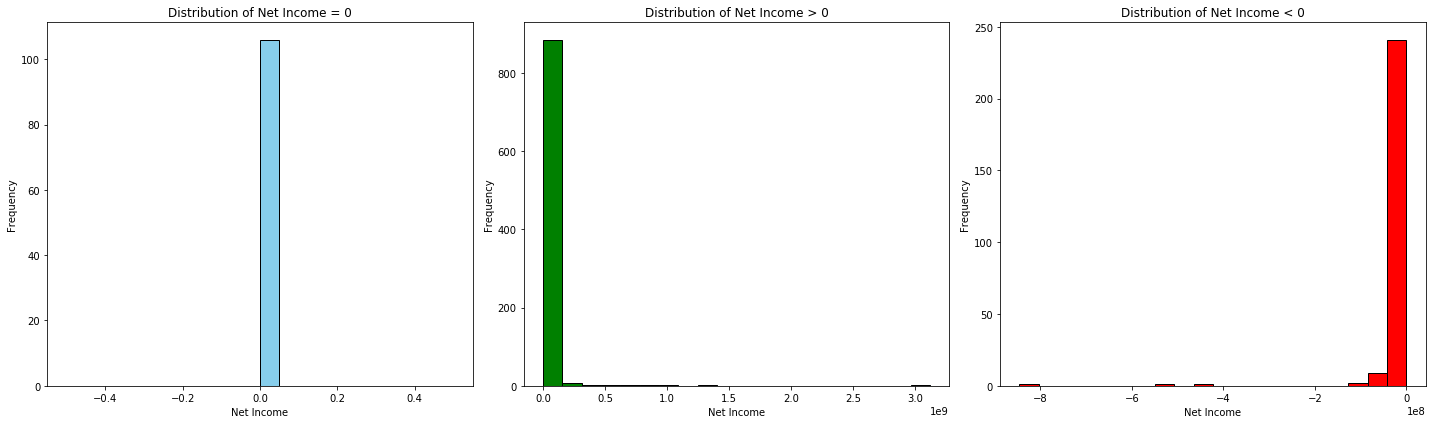

In [62]:
import matplotlib.pyplot as plt

# Data for the histograms
zero_income = [income for income in net_income_per_account if income == 0]
positive_income = [income for income in net_income_per_account if income > 0]
negative_income = [income for income in net_income_per_account if income < 0]

# Create a figure with three subplots
plt.figure(figsize=(20, 6))

# Plot for net income == 0
plt.subplot(1, 3, 1)  # 1 row, 3 columns, first subplot
plt.hist(zero_income, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Net Income = 0')
plt.xlabel('Net Income')
plt.ylabel('Frequency')

# Plot for net income > 0
plt.subplot(1, 3, 2)  # 1 row, 3 columns, second subplot
plt.hist(positive_income, bins=20, color='green', edgecolor='black')
plt.title('Distribution of Net Income > 0')
plt.xlabel('Net Income')
plt.ylabel('Frequency')

# Plot for net income < 0
plt.subplot(1, 3, 3)  # 1 row, 3 columns, third subplot
plt.hist(negative_income, bins=20, color='red', edgecolor='black')
plt.title('Distribution of Net Income < 0')
plt.xlabel('Net Income')
plt.ylabel('Frequency')

plt.tight_layout()  # Adjusts subplot params so that subplots fit into the figure area.
plt.show()

In [52]:
# get distribution of net income for dormant and closed accounts
net_income_per_account.describe()

count    1.263000e+03
mean     9.604531e+06
std      1.181607e+08
min     -8.457133e+08
25%      0.000000e+00
50%      2.178712e+04
75%      5.636245e+05
max      3.116638e+09
Name: Net Income, dtype: float64

In [76]:
# get sell/buy ratio for each account
# Calculate the sell/buy ratio for each account
sell_buy_ratio_per_account = merged_dormant_closed.groupby('Account ID')['Order Type_y'].apply(lambda x: (x == 'Sell').mean())

sell_buy_ratio_per_account

Account ID
1        1.000000
18       0.000000
40       1.000000
45       1.000000
50       1.000000
           ...   
13436    0.500000
13458    1.000000
13461    0.727273
13494    1.000000
13498    0.451389
Name: Order Type_y, Length: 1263, dtype: float64

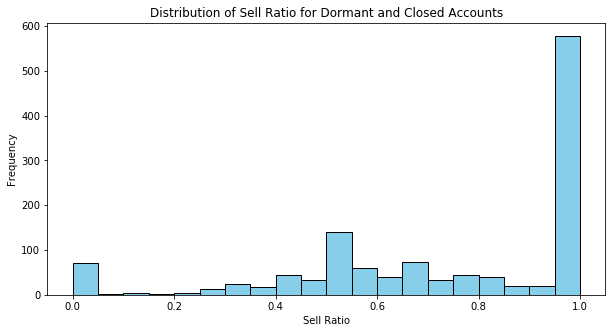

In [79]:
# plot sell/buy ratio for dormant and closed accounts
plt.figure(figsize=(10, 5))
plt.hist(sell_buy_ratio_per_account, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sell Ratio for Dormant and Closed Accounts')
plt.xlabel('Sell Ratio')
plt.ylabel('Frequency')
plt.show()

### 